#### Q1. Scenario:

The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the output of an XOR gate. Perform the following steps:

* Create the XOR gate's truth table dataset.

* Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch Pitts) Neuron.

* Observe and discuss the perceptron's performance in this scenario.

* Implement XOR using Multi-Layer Perceptron.

In [2]:
import numpy as np

# XOR gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # Expected outputs


In [10]:
class MCPNeuron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        # Initialize weights and bias
        self.weights = [1,1]
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        # Step activation function (threshold function)
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Calculate weighted sum and pass it through activation function
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)

    def train(self, X, y):
        # Training loop
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction

                # Update weights and bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

                 # Print details for each example
                print(f"  Input: {inputs}, Prediction: {prediction}, Error: {error}")
                print(f"  Updated Weights: {self.weights}, Updated Bias: {self.bias}")
            print("\n")


In [11]:
# Create perceptron object
perceptron = MCPNeuron(input_size=2)

# Train the perceptron
perceptron.train(X, y)

# Test the perceptron
for inputs, label in zip(X, y):
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs}, Predicted: {prediction}, Actual: {label}")


# A single-layer perceptron will fail to classify the XOR gate correctly,
# as XOR is not linearly separable, and this type of perceptron can only handle linearly separable problems.


  Input: [0 0], Prediction: 1, Error: -1
  Updated Weights: [1. 1.], Updated Bias: -0.1
  Input: [0 1], Prediction: 1, Error: 0
  Updated Weights: [1. 1.], Updated Bias: -0.1
  Input: [1 0], Prediction: 1, Error: 0
  Updated Weights: [1. 1.], Updated Bias: -0.1
  Input: [1 1], Prediction: 1, Error: -1
  Updated Weights: [0.9 0.9], Updated Bias: -0.2


  Input: [0 0], Prediction: 0, Error: 0
  Updated Weights: [0.9 0.9], Updated Bias: -0.2
  Input: [0 1], Prediction: 1, Error: 0
  Updated Weights: [0.9 0.9], Updated Bias: -0.2
  Input: [1 0], Prediction: 1, Error: 0
  Updated Weights: [0.9 0.9], Updated Bias: -0.2
  Input: [1 1], Prediction: 1, Error: -1
  Updated Weights: [0.8 0.8], Updated Bias: -0.30000000000000004


  Input: [0 0], Prediction: 0, Error: 0
  Updated Weights: [0.8 0.8], Updated Bias: -0.30000000000000004
  Input: [0 1], Prediction: 1, Error: 0
  Updated Weights: [0.8 0.8], Updated Bias: -0.30000000000000004
  Input: [1 0], Prediction: 1, Error: 0
  Updated Weights: [0

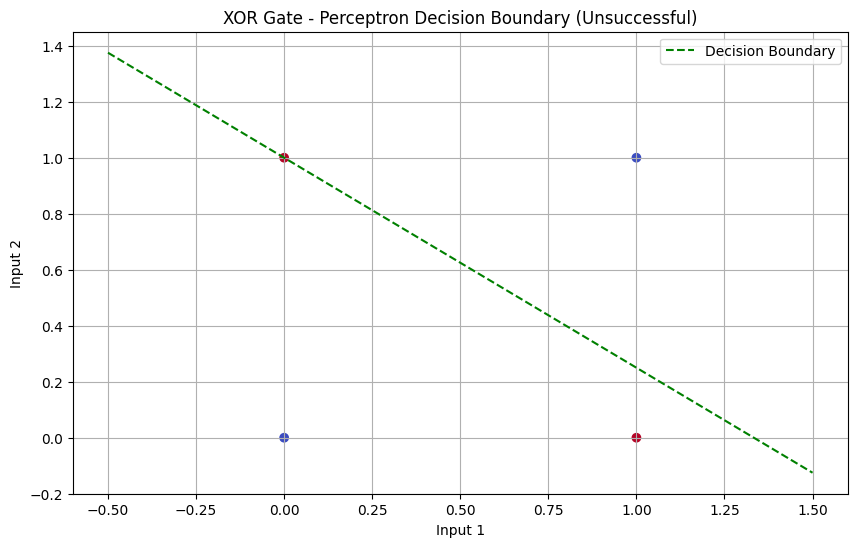

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]
plt.plot(x1, x2, 'g--', label='Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Gate - Perceptron Decision Boundary (Unsuccessful)')
plt.legend()
plt.grid(True)
plt.show()

Discussion of SLP Performance for XOR:

* The perceptron's performance in solving the XOR problem is limited.
* It struggles to converge to a solution that correctly classifies all input combinations (0,0), (0,1), (1,0), (1,1).
* This is because XOR is not linearly separable. A single perceptron (linear model) cannot draw a single line to properly classify all four data points.
* To accurately solve the XOR problem, more complex models such as a multi-layered perceptron or other neural network architectures are required.

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the MLP model
model = Sequential()

# Add input layer and one hidden layer with 2 neurons
model.add(Dense(2, input_dim=2, activation='relu'))

# Add output layer with 1 neuron
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Test the model
predictions = model.predict(X)
print('Predictions:\n', np.round(predictions))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


Discussion of MLP Performance for XOR:

* The MLP demonstrates significantly better performance in solving the XOR problem compared to a single perceptron.
* The MLP, with its hidden layer, can effectively learn the nonlinear relationship in the XOR data.
* During training, the MLP adjusts its weights and biases to minimize the error and accurately classify all four input combinations (0,0), (0,1), (1,0), (1,1).
* The hidden layer allows the MLP to create a more complex decision boundary that can separate the XOR classes, which is not possible with a linear model.
* The use of the sigmoid activation function in both the hidden and output layers further contributes to the MLP's ability to model nonlinear relationships effectively.

#### Q2. Design a sentiment analysis classification model using backpropagation and activation functions such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment (positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights during the training process. (link Provided at the top of the page to download the dataset)

Task:
* Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
* Use backpropagation to optimize the model's weights based on error calculation.
* Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
* Evaluate the model on a test set using accuracy and plot the loss over epochs.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data
df = pd.read_csv('Tweets.csv')

# Basic preprocessing
df = df[df['airline_sentiment'] != 'neutral']
df['text'] = df['text'].str.lower()

# Encode sentiment labels
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['airline_sentiment'])

# Prepare data for model
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Neural Network Model
def create_model(activation='relu'):
    model = Sequential([
        Dense(64, activation=activation, input_shape=(5000,)),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with different activation functions
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    histories[activation] = history

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{activation.capitalize()} - Test accuracy: {test_acc:.4f}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Relu - Test accuracy: 0.9173
Sigmoid - Test accuracy: 0.9117
Tanh - Test accuracy: 0.9017


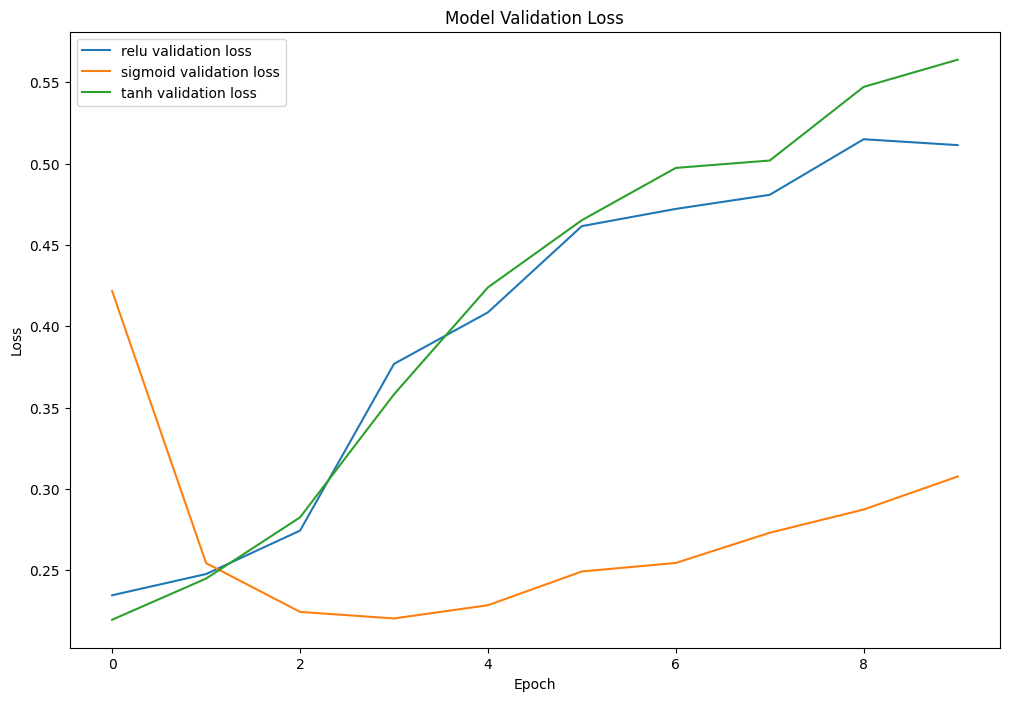

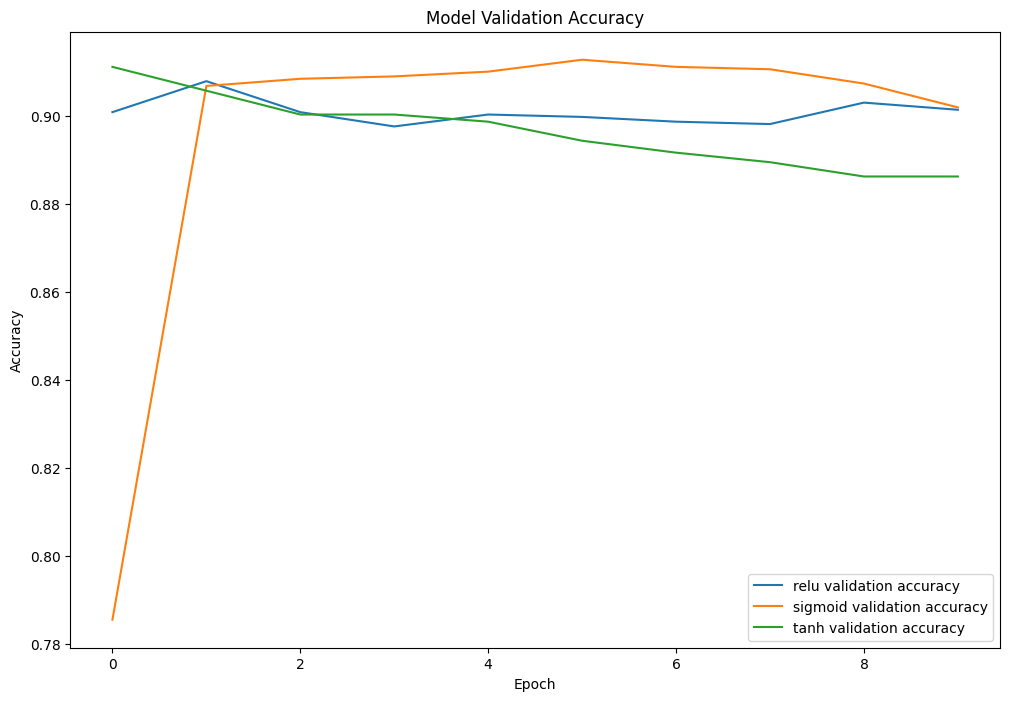

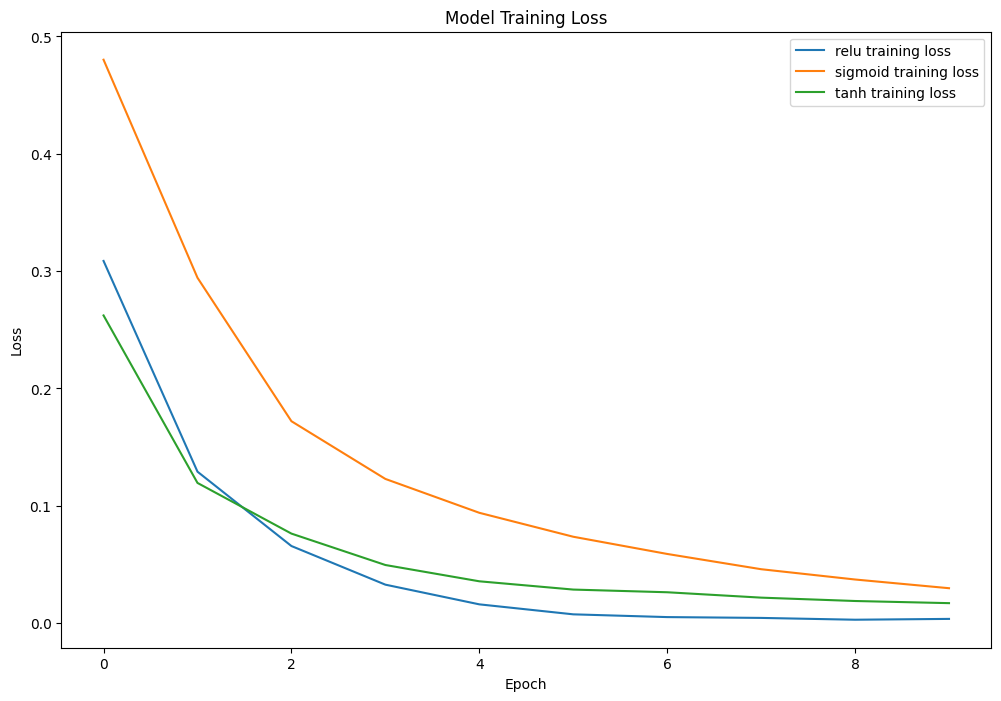

In [34]:
# Plot training history
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{activation} validation loss')
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{activation} validation accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Plot the loss over Epocs
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(history.history['loss'], label=f'{activation} training loss')
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
